<a href="https://colab.research.google.com/github/Najme61/3D-CNN-Keras/blob/master/ucsd2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.DataFrame({'Name':['Bob','Jen','Tim'],
                   'age':[20,30,40],
                   'pet':['cat', 'dog', 'bird']})
df.to_csv('/content/Mydrive/My Drive/test folder/t1.csv')
df


,Name,age,pet
0,Bob,20,cat
1,Jen,30,dog
2,Tim,40,bird


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import math
import cv2
import numpy as np
import time
start  = time.time()
from google.colab.patches import cv2_imshow

def hist_equalizer(img):
	b,g,r = cv2.split(img)
	red = cv2.equalizeHist(r)
	green = cv2.equalizeHist(g)
	blue = cv2.equalizeHist(b)
    
	return cv2.merge((blue,green,red))
def colordist(x,v):
    x_square  = np.inner(x,x)
    v_square  = np.inner(v,v)
    xv_square = np.inner(x,v)*np.inner(x,v)
    p_square = (xv_square)/v_square
    return math.sqrt(abs(x_square-p_square))
def brightness(v,C):
    I = v[0] + v[1] + v[2]
    I_max = C[1][1]#C11 = I max
    I_min = C[1][0]#C10 = I min
    I_low = alpha*I_max
    I_hi = max(beta*I_max,I_min/alpha)
    if I<=I_hi and I>=I_low:
        return True
    return False
def find_match(x,C):
    for i in range(len(C)):
        #print(colordist(x,C[i][0]))
        if colordist(x,C[i][0]) <=eps1 and brightness(x,C[i]) == True:
           # print('match')
            Bm = x[0]
            Gm = x[1]
            Rm = x[2]
            B = C[i][0][0]
            G = C[i][0][1]
            R = C[i][0][2]
            I = Bm+Gm+Rm
            I_min = C[i][1][0]
            I_max = C[i][1][1]
            f = C[i][1][2]
            lamda = C[i][1][3]
            p = C[i][1][4]
            q = C[i][1][5]
            C[i][0] = [(f*Rm+R)/(f+1),(f*Gm+G)/(f+1),(f*Bm+B)/(f+1)]
            C[i][1] = [min(I,I_min),max(I,I_max),f+1,max(lamda,t-q),p,t]
            return True      
    return False
def find_match2(x,C):
    for i in range(len(C)):
        #print(colordist(x,C[i][0]))
        if colordist(x,C[i][0]) <=eps2 and brightness(x,C[i]) == True:
            return True      
    return False    
N = 5 #sample of background trainning
eps1 = 10  #trainning threshold
eps2 = 30 #detection threshold
alpha = 0.7
beta = 1.1

#cap = cv2.VideoCapture('test2.mp4')
#_,frame = cap.read()
frame = cv2.imread('/content/1_2.JPEG')
#frame = hist_equalizer(frame)
H,W,channel = frame.shape

Map = [[[] for x in range (W)] for y in range (H)]
for i in range(N):
    #_,frame = cap.read()
    t = i+1
    I = 0
    print(i)
    for h in range(H):
        for w in range(W):
            B = float(frame[h,w,0])
            G = float(frame[h,w,1])
            R = float(frame[h,w,2])
            x = [B,G,R]
            I = B+G+R
            if Map[h][w] == None or find_match(x,Map[h][w]) == False:
                new_cw = [[B,G,R],[I,I,1,t-1,t,t]] #0,0,1,0,1,1
                Map[h][w].append(new_cw)
print(Map[100][100])
 

#cap = cv2.VideoCapture('1.JPEG')

frame2 = cv2.imread('/content/1.JPEG')
#frame2 = hist_equalizer(frame2)
for h in range(H):
        for w in range(W):
                B = float(frame2[h,w,0])
                G = float(frame2[h,w,1])
                R = float(frame2[h,w,2])
                x = [B,G,R]
                I = B+G+R
                if find_match2(x,Map[h][w]) == True:
                    frame2[h,w,0] = 0
                    frame2[h,w,1] = 0
                    frame2[h,w,2] = 0
cv2_imshow(frame2)
cv2_imshow(frame)
cv2.imwrite('/content/Final.jpg',frame2)
cv2.imwrite('/content/First.jpg',frame)
end = t
ime.time()
print(end-start)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from google.colab import drive
drive.mount('Mydrive')
!ls 'Mydrive/My Drive/UCSD/UCSDped2'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at Mydrive
GT_ped2  Test  Train


In [ ]:
import cv2
vidcap = cv2.VideoCapture('/content/Mydrive/My Drive/UMN/Crowd-Activity-All.avi')
path='/content/Mydrive/My Drive/UMN'
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite(os.path.join("image"+str(count)+".jpg", image)    # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [ ]:
#create clip frame images
import cv2
import numpy as np
import os
import os.path
from os import listdir
from os.path import isfile, join, isdir
def frames_to_video(inputpath,outputpath,fps):
   image_array = []
   files = [f for f in os.listdir(inputpath) if os.path.isfile(join(inputpath, f))]
   #files.sort(key = lambda x: x[5:-4])
   files.sort(key = lambda x: x[5:-4])
   
   for i in range(len(files)):
       img = cv2.imread(inputpath + files[i])
       size =  (img.shape[1],img.shape[0])
       img = cv2.resize(img,size)
       image_array.append(img)
   fourcc = cv2.VideoWriter_fourcc('D', 'I', 'V', 'X')
   out = cv2.VideoWriter(outputpath,fourcc, fps, size)
   for i in range(len(image_array)):
       out.write(image_array[i])
   out.release()


inputpath = '/content/Mydrive/My Drive/UCSD/UCSDped2/Test/Test001/'
outpath =  '/content/Mydrive/My Drive/test folder/test01.avi'
fps = 12
frames_to_video(inputpath,outpath,fps)

In [ ]:
import cv2
import numpy as np
import os
from os.path import isfile, join
pathIn= '/content/Mydrive/My Drive/UCSD/UCSDped1/Test/Test003/'
pathOut = '/content/Mydrive/My Drive/test folder/test3.mp4'
fps = 29
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
files.sort()
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
for i in range(len(files)):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = (238,158,3)
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

In [ ]:
import cv2
import numpy as np
import os
from os.path import isfile, join
pathIn= '/content/Mydrive/My Drive/UCSD/UCSDped1/Test/Test003/'
pathOut = '/content/Mydrive/My Drive/test folder/test3.mp4'
fps = 29
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
files.sort()
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
for i in range(len(files)):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = (238,158,3)
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

In [ ]:
DATASET_PATH ="/content/Mydrive/My Drive/UCSD/UCSDped2/Train"
#SINGLE_TEST_PATH = "/content/Mydrive/My Drive/UCSD/UCSDped2/Test/Test001"
BATCH_SIZE = 4
EPOCHS = 50
MODEL_PATH = "/content/Mydrive/My Drive/event dect/new_model.h5"

In [ ]:
#preprocesing UCSD Ped2 dataset
DATASET_PATH ="/content/Mydrive/My Drive/UCSD/UCSDped2/Train"
from os import listdir
from os.path import isfile, join, isdir
from PIL import Image
import numpy as np
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from keras.preprocessing.image import img_to_array, load_img

def get_clips_by_stride2(stride, frames_list, sequence_size):
    clips = []
    sz = len(frames_list)
    clip = np.zeros(shape=(sequence_size, 224, 224, 1))
    cnt = 0
    for start in range(0, stride):
        for i in range(start, sz, stride):
            clip[cnt, :, :, 0] = frames_list[i]
            cnt = cnt + 1
            if cnt == sequence_size:
                clips.append(clip)
                cnt = 0
    return clips


def get_training_set2():
    clips = []
    # loop over the training folders (Train000,Train001,..)
    for f in sorted(listdir(DATASET_PATH)):
        if isdir(join(DATASET_PATH, f)):
            all_frames = []
            # loop over all the images in the folder (0.tif,1.tif,..,199.tif)
            for c in sorted(listdir(join(DATASET_PATH, f))):
                if str(join(join(DATASET_PATH, f), c))[-3:] == "tif":
                    img = Image.open(join(join(DATASET_PATH, f), c)).resize((224, 224))
                    img = np.array(img, dtype=np.float32) / 256.0
                    img = rgb2gray(img)
                    #img -= img.mean()
                    #img /= img.std()
                    all_frames.append(img)
            # get the 10-frames sequences from the list of images after applying data augmentation
            for stride in range(1, 3):
                clips.extend(get_clips_by_stride2(stride=stride, frames_list=all_frames, sequence_size=10))
    return clips

Using TensorFlow backend.


In [ ]:
!pip install keras-layer-normalization

In [ ]:
import datetime
training_set2= get_training_set2()
training_set2 = np.array(training_set2)
training_set2 = training_set2.reshape(-1,10,224,224,1)
start= datetime.datetime.now()
history= model.fit(training_set2, training_set2, 
            batch_size=4, epochs=10, shuffle=False, validation_split=0.2)
end= datetime.datetime.now()
#elapsed=end-start
model.save('/content/Mydrive/My Drive/event dect/new_model2.h5')
print('Total trainnig time is = ',(end-start))

In [ ]:
#train model with training set
import keras
import matplotlib.pyplot as plt
from keras.layers import Conv2DTranspose, ConvLSTM2D, BatchNormalization, TimeDistributed, Conv2D
from keras.models import Sequential, load_model
from keras import callbacks
from keras_layer_normalization import LayerNormalization

training_set = get_training_set2()
training_set = np.array(training_set)
training_set = training_set.reshape(-1,10,224,224,1)
seq = Sequential()
seq.add(TimeDistributed(Conv2D(128, (11, 11), strides=4, padding="same"), batch_input_shape=(None, 10, 224, 224, 1)))
seq.add(LayerNormalization())
seq.add(TimeDistributed(Conv2D(64, (5, 5), strides=2, padding="same")))
seq.add(LayerNormalization())
# # # #
seq.add(ConvLSTM2D(64, (3, 3), padding="same", return_sequences=True))
seq.add(LayerNormalization())
seq.add(ConvLSTM2D(32, (3, 3), padding="same", return_sequences=True))
seq.add(LayerNormalization())
seq.add(ConvLSTM2D(64, (3, 3), padding="same", return_sequences=True))
seq.add(LayerNormalization())
# # # # #
seq.add(TimeDistributed(Conv2DTranspose(64, (5, 5), strides=2, padding="same")))
seq.add(LayerNormalization())
seq.add(TimeDistributed(Conv2DTranspose(128, (11, 11), strides=4, padding="same")))
seq.add(LayerNormalization())
seq.add(TimeDistributed(Conv2D(1, (11, 11), activation="sigmoid", padding="same")))
seq.summary()
#----------------------------------
'''
model_checkpoint = callbacks.ModelCheckpoint('/model.{epoch}.h5')
logger = callbacks.CSVLogger('training.log')
tensorboard = callbacks.TensorBoard(log_dir='./tensorboard')
callbacks = [model_checkpoint, logger, tensorboard]
'''
#----------------------------------
seq.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=1e-4, decay=1e-5, epsilon=1e-6))
import datetime
start= datetime.datetime.now()
history= seq.fit(training_set, training_set, 
            batch_size=4, epochs=EPOCHS, shuffle=False, validation_split=0.2)
#seq.save(Config.MODEL_PATH)
end= datetime.datetime.now()
#elapsed=end-start
#print('Total trainnig time is = ',str(elapse))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 10, 56, 56, 128)   15616     
_________________________________________________________________
layer_normalization_1 (Layer (None, 10, 56, 56, 128)   256       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 10, 28, 28, 64)    204864    
_________________________________________________________________
layer_normalization_2 (Layer (None, 10, 28, 28, 64)    128       
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 10, 28, 28, 64)    295168    
_________________________________________________________________
layer_normalization_3 (Layer (None, 10, 28, 28, 64)    128       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 10, 28, 28, 32)   

In [ ]:
print('Total trainnig time is with epoch=30 = ',(end-start))

Total trainnig time is with epoch=30 =  0:11:11.075083


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import datetime
training_set2= get_training_set2()
training_set2 = np.array(training_set2)
training_set2 = training_set2.reshape(-1,10,224,224,1)
start= datetime.datetime.now()
###############################
callback_save = ModelCheckpoint("/content/Mydrive/My Drive/event dect/model_set2.h5", monitor="mean_squared_error", save_best_only=True)
callback_early_stopping = EarlyStopping(monitor='val_loss', patience=5)
 ################################
history= model.fit(training_set2, training_set2, 
            batch_size=4, epochs=10, shuffle=False, validation_split=0.2, callbacks = [callback_save,callback_early_stopping])
end= datetime.datetime.now()
#elapsed=end-start
#model.save('/content/Mydrive/My Drive/event dect/new_model2.h5')
print('Total trainnig time is = ',(end-start))

Train on 408 samples, validate on 102 samples
Epoch 1/10
408/408 [==============================] - 214s 523ms/step - loss: 0.0419 - val_loss: 0.0312
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with mean_squared_error available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


408/408 [==============================] - 215s 527ms/step - loss: 0.0083 - val_loss: 0.0022
Epoch 3/10
408/408 [==============================] - 216s 528ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 4/10
408/408 [==============================] - 216s 528ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 5/10
408/408 [==============================] - 216s 528ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 6/10
408/408 [==============================] - 215s 528ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 7/10
408/408 [==============================] - 216s 529ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 8/10
408/408 [==============================] - 216s 529ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 9/10
408/408 [==============================] - 215s 528ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 10/10
408/408 [==============================] - 215s 528ms/step - loss: 0.0015 - val_loss: 0.0011
Total trainnig time is =  0:35:53.146331


Total trainnig time is with epoch=50 =  0:50:43.352385
plot history with epoch=50


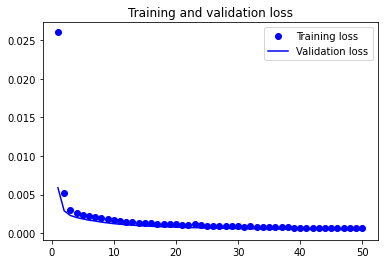

<Figure size 432x288 with 0 Axes>

In [ ]:
print('Total trainnig time is with epoch=50 = ',(end-start))
print('plot history with epoch=50')
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
seq.save('/content/Mydrive/My Drive/event dect/model_set2_50.h5')

plot history with epoch=30


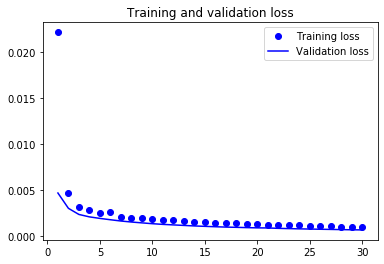

<Figure size 432x288 with 0 Axes>

In [ ]:
print('plot history with epoch=3')
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
seq.save(MODEL_PATH)

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
print('model loaded')
from keras.models import load_model
from keras_layer_normalization import LayerNormalization
import numpy as np
MODEL_PATH= "/content/Mydrive/My Drive/event dect/model_set2_50.h5"
model=load_model(MODEL_PATH, custom_objects=({'LayerNormalization' : LayerNormalization}))


model loaded


In [ ]:
!git clone https://github.com/asvcode/Colab_UI.git

Cloning into 'Colab_UI'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 57 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.


In [ ]:
from Colab_UI.colab_ui import*

In [ ]:
#=========================== all test frames
from skimage.color import rgb2gray
from os import listdir
from os.path import isfile, join, isdir
from PIL import Image
import cv2

DATASET_PATH="/content/Mydrive/My Drive/UCSD/UCSDped2/Test"
#sz = len(listdir(SINGLE_TEST_PATH))
test = np.zeros(shape=(2010, 224, 224, 1))
cnt = 0
for f in sorted(listdir(DATASET_PATH)):
        if isdir(join(DATASET_PATH, f)):
            all_frames = []
            # loop over all the images in the folder (0.tif,1.tif,..,199.tif)
            for c in sorted(listdir(join(DATASET_PATH, f))):
                if str(join(join(DATASET_PATH, f), c))[-3:] == "tif":
                    img = Image.open(join(join(DATASET_PATH, f), c)).resize((224, 224))
                    img = np.array(img, dtype=np.float32) / 256.0
                    img = rgb2gray(img)
                    #img -= img.mean()
                    #img /= img.std()
                    #all_frames.append(img)
                    test[cnt, :, :, 0] = img
                    cnt = cnt + 1
print (test.shape)                    
#===============================================================================

(2010, 224, 224, 1)


In [ ]:
!apt install octave

for all Test frame and Ground Truth









In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import os
path_gt= "/content/Mydrive/My Drive/UCSD/UCSDped2/GT_ped2"
gt = np.zeros(2010,)
img_gt=np.zeros(shape=(2010, 224, 224,1))
r = 0
tem=np.zeros(shape=(2010, 224, 224,1))
for f in sorted(listdir(path_gt)):
        if isdir(join(path_gt, f)):
            for c in sorted(listdir(join(path_gt, f))):
                if str(join(join(path_gt, f), c))[-3:] == "bmp":
                    img = Image.open(join(join(path_gt, f), c)).resize((224, 224))
                    img = np.array(img, dtype=np.float32) / 256.0
                    img_gt[r,:,:,0]=img 
                    r+=1  
                    
for i in range (0,2010):
      tem[i]=img_gt[i,:,:,:]
      if (np.mean(tem[i])>0.0):
            gt[i]=1.0
      else:
         gt[i]=0.0
      gt=np.array(gt)

en=len(gt)
s=gt[10:en] 
print('s=',s.shape)
#==================================================
print('test=',test.shape)
sz = test.shape[0] - 10
sequences = np.zeros((sz, 10, 224, 224, 1))
# apply the sliding window technique to get the sequences
for i in range(0, sz):
    clip2 = np.zeros((10, 224, 224, 1))
    for j in range(0, 10):
        clip2[j] = test[i + j, :, :, :]
        sequences[i] = clip2

print("got data")
    # get the reconstruction cost of all the sequences
reconstructed_sequences = model.predict(sequences,batch_size=4)
sequences_reconstruction_cost = np.array([np.linalg.norm(np.subtract(sequences[i],reconstructed_sequences[i])) for i in range(0,sz)])
sa = (sequences_reconstruction_cost - np.min(sequences_reconstruction_cost)) / np.max(sequences_reconstruction_cost)
sr = 1.0 - sa
sr.shape

s= (2000,)
test= (2010, 224, 224, 1)
got data


(2000,)

plot all test2 with epoch=3


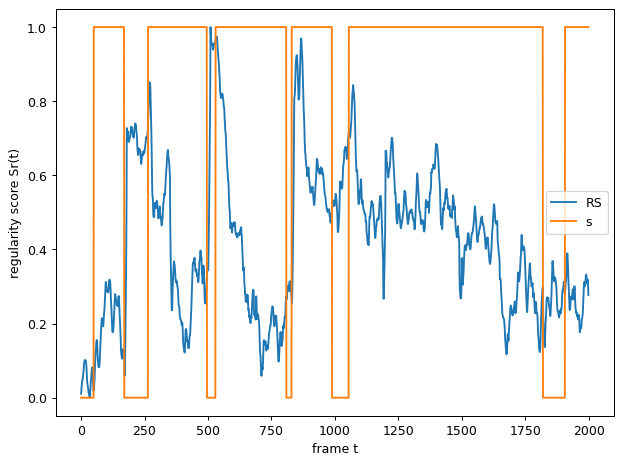

0.0
1.0


In [ ]:
print('plot all test2 with epoch=3')
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi=90)

plt.plot(sr, label='RS')
plt.plot(s, label='s')
#plt.fill_between(sr, np.min(s), np.max(s), where=s<sr, color='r', alpha=.4, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()
print(np.min(sr))
print(np.max(sr))

plot all test2 with epoch=50


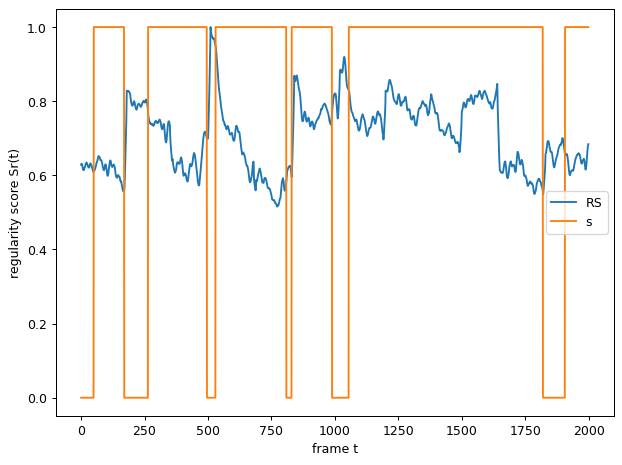

0.5154791071372369
1.0


In [ ]:
print('plot all test2 with epoch=50')
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi=90)

plt.plot(sr, label='RS')
plt.plot(s, label='s')
#plt.fill_between(sr, np.min(s), np.max(s), where=s<sr, color='r', alpha=.4, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()
print(np.min(sr))
print(np.max(sr))

In [ ]:
#preprocessing test_set
from skimage.color import rgb2gray
from os import listdir
from os.path import isfile, join, isdir
from PIL import Image
import cv2

SINGLE_TEST_PATH = "/content/Mydrive/My Drive/UCSD/UCSDped2/Test/Test004"
sz = len(listdir(SINGLE_TEST_PATH))
test = np.zeros(shape=(sz, 224, 224, 1))
cnt = 0
for f in sorted(listdir(SINGLE_TEST_PATH)):
      if str(join(SINGLE_TEST_PATH, f))[-3:] == "tif":
            img = Image.open(join(SINGLE_TEST_PATH, f)).resize((224, 224))
            img = np.array(img, dtype=np.float32) / 256.0
            img = rgb2gray(img)
            #img -= img.mean()
            #img /= img.std()
            test[cnt, :, :, 0] = img
            cnt = cnt + 1
print (test.shape)

(180, 224, 224, 1)


In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import os

path= "/content/Mydrive/My Drive/UCSD/UCSDped2/GT_ped2/Test004_gt/"

d=os.listdir(path)
gt=np.zeros(len(d),)
for i in range (0,len(d)):
    img=load_img(path+d[i])
    img=img_to_array(img)
    img = resize(img,(224,224,1))
    img = np.array(img, dtype=np.float32) / 256.0 
    img = np.mean(img)
    if (img>0.0):
         gt[i]=1.0
    else:
          gt[i]=0.0
    gt=np.array(gt)      

s=gt[10:len(gt)] 
print('s=',s.shape)         

print('test=',test.shape)
sz = test.shape[0] - 10
sequences = np.zeros((sz, 10, 224, 224, 1))
# apply the sliding window technique to get the sequences
for i in range(0, sz):
    clip2 = np.zeros((10, 224, 224, 1))
    for j in range(0, 10):
        clip2[j] = test[i + j, :, :, :]
        sequences[i] = clip2

print("got data")
    # get the reconstruction cost of all the sequences
reconstructed_sequences = model.predict(sequences,batch_size=4)
sequences_reconstruction_cost = np.array([np.linalg.norm(np.subtract(sequences[i],reconstructed_sequences[i])) for i in range(0,sz)])
sa = (sequences_reconstruction_cost - np.min(sequences_reconstruction_cost)) / (np.max(sequences_reconstruction_cost)- np.min(sequences_reconstruction_cost))
sr = 1.0 - sa
sr.shape
#patm_m ='/content/Mydrive/My Drive/matlab/filter_features_by_persistence.m'


s= (170,)
test= (180, 224, 224, 1)
got data


(170,)

In [ ]:
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
from keras.preprocessing.image import img_to_array, load_img
import os
import pandas as pd

path= "/content/Mydrive/My Drive/UCSD/UCSDped2/GT_ped2/Test004_gt/"

d=os.listdir(path)
gt=np.zeros(len(d),)
for i in range (0,len(d)):
    img=load_img(path+d[i])
    img=img_to_array(img)
    img = resize(img,(224,224,1))
    img = np.array(img, dtype=np.float32) / 256.0
    
    img = np.mean(img)
    if (img>0.0):
         gt[i]=1
    else:
          gt[i]=0
    gt=np.array(gt)      
en=len(gt)
s=gt[10:en] 
print('s=',s.shape)
#==================================
print(s.shape)
sr = sr.reshape(len(sr),1)

print('sr=',sr.shape)
#m_c = np.ones((len(sr), 4))
#m_c=temp
m_c = np.zeros((len(sr), 4))
for i in range(0,len(sr)):
     m_c[i,0]=i+11
     m_c[i,1]=sr[i]
     if (sr[i]<=0.9995999554713408):
            m_c[i,2]=1
     if (sr[i]>0.9995999554713408):
            m_c[i,2]=0
            
     m_c[i,3]=s[i]

df = pd.DataFrame({'rows':m_c[:,0],
                   'SR':m_c[:,1],
                   'gt':m_c[:,2],
                   'GT':m_c[:,3]})
df.to_csv('/content/Mydrive/My Drive/test folder/test4.csv') 

np.set_printoptions(formatter={'float':"{:6.5g}".format})
print(m_c)

s= (170,)
(170,)
sr= (170, 1)
[[    11      1      0      0]
 [    12 0.98231      1      0]
 [    13 0.9678      1      0]
 [    14 0.95724      1      0]
 [    15 0.9476      1      0]
 [    16 0.94238      1      0]
 [    17 0.93907      1      0]
 [    18 0.93686      1      0]
 [    19 0.93117      1      0]
 [    20 0.92732      1      0]
 [    21 0.92406      1      0]
 [    22 0.92424      1      0]
 [    23 0.92419      1      0]
 [    24 0.92656      1      0]
 [    25 0.92609      1      0]
 [    26 0.91984      1      0]
 [    27 0.90904      1      0]
 [    28 0.89922      1      0]
 [    29 0.89273      1      0]
 [    30 0.88611      1      0]
 [    31 0.87716      1      1]
 [    32 0.86805      1      1]
 [    33 0.85599      1      1]
 [    34 0.83546      1      1]
 [    35 0.81012      1      1]
 [    36 0.78511      1      1]
 [    37 0.76213      1      1]
 [    38 0.73807      1      1]
 [    39 0.7159      1      1]
 [    40 0.69593      1      1]
 [    41 0.675

plot all test4 with epoch=50


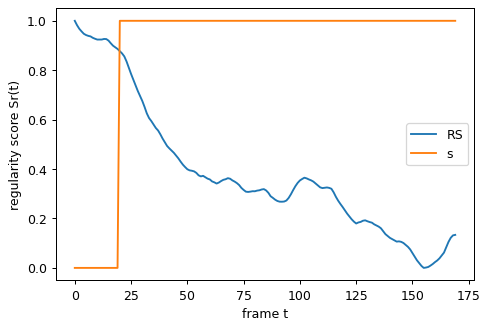

0.0
1.0


In [ ]:
print('plot all test4 with epoch=50')
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4), dpi=90)

plt.plot(sr, label='RS')
plt.plot(s, label='s')
#plt.fill_between(sr, np.min(s), np.max(s), where=s<sr, color='r', alpha=.4, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()
print(np.min(sr))
print(np.max(sr))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
'/content/Mydrive/My Drive/test folder/test4.csv'
    data.columns = {title}   

    return data
#=============================
%matplotlib notebook
title = 'test4.csv'
d = get_data(sr,18,title)
x = np.array(d.index)
y = np.array(d['test4.csv'])
score = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
score.columns = {title}

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


fig = plt.figure(figsize=(10,6))
plt.xlim(0, 1)
plt.ylim(np.min(score)[0], np.max(score)[0])
plt.xlabel('sr',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('score regularity',fontsize=20)


def animate(i):

    data = score.iloc[:int(i+1)] #select data range

    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")

    p.tick_params(labelsize=17)

    plt.setp(p.lines,linewidth=7)
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)
ani.save('sr_test4.avi', writer=writer)


AttributeError: ignored

In [ ]:
X=m_c[:,1]
y=m_c[:,-1]
def selectThreshHold(y, X):
    
    F1 = 0
    bestF1 = 0
    bestEpsilon = 0
    
    stepsize = (np.max(X) - np.min(X))/1000
        
    epsVec = np.arange(np.min(X), np.max(X), stepsize)
    noe = len(epsVec)
    
    for eps in range(noe):
        epsilon = epsVec[eps]
        pred = (X < epsilon)
        prec, rec = 0,0
        tp,fp,fn = 0,0,0
        
        try:
            for i in range(np.size(X,0)):
                if ((pred[i] == 1)&(y[i] == 1)):
                    tp+=1
                elif ((pred[i] == 1)&(y[i] == 0)):
                    fp+=1
                elif ((pred[i] == 0)&(y[i] == 1)):
                    fn+=1
            prec = tp/(tp + fp)
            rec = tp/(tp + fn)
            F1 = 2*prec*rec/(prec + rec)
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon = epsilon
        except ZeroDivisionError:
            print('Warning dividing by zero!!')          
       
    return bestF1, bestEpsilon

F1, epsilon = selectThreshHold(y, X)
print('Epsilon and F1 are:',epsilon, F1)    

Warning dividing by zero!!
Epsilon and F1 are: 0.9995999554713408 0.8235294117647058


/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


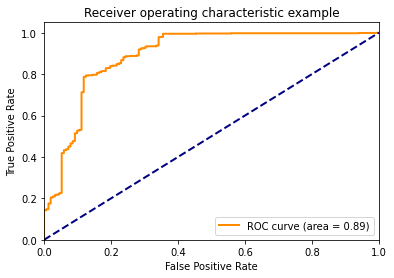

In [ ]:
# with thre .99
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
X=m_c[:,:-1]
y=m_c[:,-1]
y=y.reshape(-1,1)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 ))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
F1, epsilon = selectThreshHold(y, X)
print('Epsilon and F1 are:',epsilon, F1)

Warning dividing by zero!!
Epsilon and F1 are: 0.8150000000000001 0.9596774193548387


In [ ]:
X=m_c[:,1]
y=m_c[:,-1]

In [ ]:
m_c = np.concatenate([temp,m_c])    

In [ ]:
temp=m_c
temp.shape

(1890, 4)

plot all test2 with epoch=30


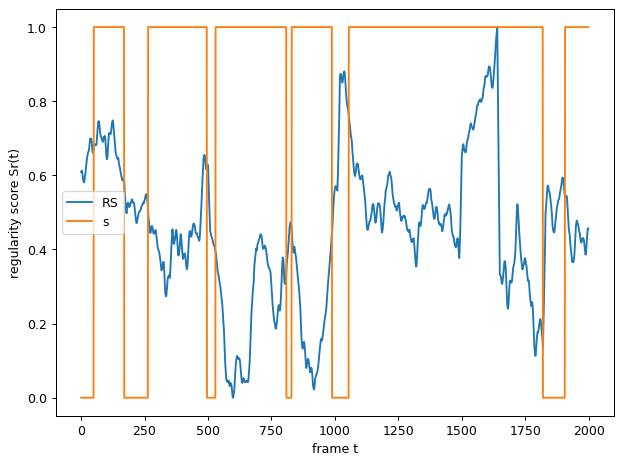

0.0
1.0


In [ ]:
print('plot all test2 with epoch=30')
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi=90)

plt.plot(sr, label='RS')
plt.plot(s, label='s')
#plt.fill_between(sr, np.min(s), np.max(s), where=s<sr, color='r', alpha=.4, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()
print(np.min(sr))
print(np.max(sr))

In [ ]:
from scipy.signal import argrelextrema
data = sr
maximums = argrelextrema(data, np.greater)
minimums = argrelextrema(data, np.less)
print('maximums=',np.max(maximums))
print('minimums=',minimums)

maximums= 1997
minimums= (array([  12,   38,   46,   58,   85,   92,  102,  112,  116,  143,  164,
        169,  179,  190,  205,  218,  247,  273,  287,  317,  335,  349,
        365,  383,  402,  417,  434,  453,  465,  494,  574,  580,  586,
        599,  620,  635,  646,  651,  657,  692,  717,  767,  783,  805,
        838,  873,  887,  902,  918,  949, 1010, 1029, 1079, 1087, 1100,
       1129, 1138, 1160, 1173, 1186, 1237, 1244, 1262, 1270, 1274, 1285,
       1288, 1291, 1303, 1308, 1320, 1337, 1352, 1354, 1361, 1371, 1391,
       1411, 1414, 1423, 1437, 1441, 1465, 1476, 1490, 1514, 1545, 1562,
       1569, 1577, 1597, 1600, 1621, 1659, 1682, 1696, 1740, 1762, 1774,
       1790, 1801, 1820, 1864, 1908, 1936, 1940, 1972, 1988]),)


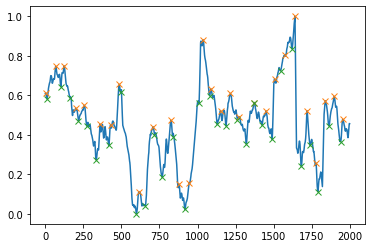

In [ ]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

#y = np.array([-2.7, -2.5, -2.1, -2.1, -1.8, -1.4, -0.9, -0.2, 0.5, 1.4, 2.2, 2.9, 3.5, 3.8, 3.8, 3.3, 2.3, 1.1, -0.5, -2.1, -3.5, -4.7, -5.5, -5.8, -5.6, -5.0, -4.2, -3.3, -2.3, -1.4, -0.8, -0.3, 0.0, 0.2, 0.2, 0.2, 0.1, 0.0, 0.0, 0.0, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.1, -0.1, -0.1, -0.1, -0.1, -0.2, -0.3, -0.4, -0.4, -0.5, -0.4, -0.3, -0.1, 0.2, 0.5, 0.7, 0.9, 0.9, 1.0, 0.9, 0.9, 0.9, 0.8, 0.7, 0.6, 0.3, 0.0, -0.4, -0.9, -1.3, -1.5, -1.6, -1.5, -1.1, -0.5, 0.2, 1.2, 2.1, 3.0, 3.8, 4.3, 4.3, 4.0, 3.2, 1.9, 0.4, -1.3, -3.0, -4.4, -5.4, -6.0, -6.0, -5.6, -4.8, -3.9, -2.9, -1.9, -1.2, -0.6, -0.2, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, -0.1, -0.1, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.1, -0.1, -0.2, -0.2, -0.2, -0.2, -0.1, -0.1, 0.0, 0.0, 0.0, 0.0, -0.1, -0.3, -0.5, -0.7, -0.9, -1.1, -1.1, -1.0, -0.8, -0.4, 0.3, 1.1, 1.9, 2.8, 3.6, 4.2, 4.5, 4.5, 4.1, 3.4, 2.5, 1.5, 0.5, -0.5, -1.4, -2.1, -2.8, -3.3, -3.7, -3.9, -3.9, -3.8, -3.4, -2.9, -2.2, -1.3, -0.4, 0.7, 1.7, 2.5, 3.2, 3.6, 3.6, 3.2, 2.4, 1.3, -0.1, -1.6, -3.0, -4.1, -4.9, -5.1, -5.0, -4.4, -3.6, -2.7, -1.8, -1.1, -0.5, -0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0.0, -0.1, -0.1])
y=sr
# Get the maxima and minima
maxima, _ = find_peaks(y, distance = 50)
minima, _ = find_peaks(-y, distance = 50)

fig, ax = plt.subplots()

ax.plot(y)
ax.plot(maxima, y[maxima], 'x')
ax.plot(minima, y[minima], 'x')
plt.show()

In [ ]:
minima

array([  12,  102,  164,  218,  273,  335,  417,  494,  599,  657,  717,
        767,  838,  918, 1010, 1079, 1129, 1186, 1262, 1320, 1371, 1423,
       1490, 1545, 1621, 1682, 1740, 1790, 1864, 1940])

In [ ]:
pip install oct2py

In [ ]:
from oct2py import Oct2Py
oc = Oct2Py()


script = "function y = myScript(x)\n" \
         "    y = x-5" \
         "end"

with open("myScript.m","w+") as f:
    f.write(script)

oc.myScript(7)

In [ ]:
pip install matlab

  Created wheel for matlab: filename=matlab-0.1-cp36-none-any.whl size=1180 sha256=6187a547174f44ba6cd45110b965f6206cb630ac7f06327854142ad07402b152
  Stored in directory: /root/.cache/pip/wheels/fe/ea/9a/2d99da71ec929e083a47e62aa641d25c95cb0cb32fb288b817
Successfully built matlab


In [ ]:
from scipy import io
from scipy.io import loadmat
from numpy import *
from pylab import *
import pandas as pd
import matlab.engine
eng = matlab.engine.start_matlab()
eng.desktop(nargout=0)
mf = loadmat('/content/Mydrive/My Drive/matlab/filter_features_by_persistence.m')

#tf = eng.isprime(37)
#print(tf)
#True

In [ ]:
!octave '/content/Mydrive/My Drive/matlab/reconstruct1d.m'

octave: X11 DISPLAY environment variable not set
octave: disabling GUI features


In [ ]:
colab_ui()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

mounting drive
Mounted at /content/gdrive
drive mounted


Text(value='')

Button(description='Load Path', style=ButtonStyle())

22571
/content/gdrive/My Drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

>> Vision_UI_Colab Last Update: 10/12/2019 

>> System info 



Button(description='System Info', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

>> Currently only works with files FROM_FOLDERS



ToggleButtons(button_style='success', description='Data In:', disabled=True, options=('from_folder',), tooltip…

ToggleButtons(button_style='info', description='Normalization:', options=('Imagenet', 'Custom', 'Cifar', 'Mnis…

ToggleButtons(description='Architecture:', options=('alexnet', 'BasicBlock', 'densenet121', 'densenet161', 'de…

Button(description='FOR Xresnet models:  Are not pretrained so have to UNCHECK Pretrain box to avoid errors.',…

Checkbox(value=True, description='Pretrained:')

FloatSlider(value=32.0, continuous_update=False, description='Batch size', layout=Layout(border='solid', heigh…

FloatSlider(value=128.0, continuous_update=False, description='Image size', layout=Layout(border='solid', heig…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

>> Choose image to view augmentations:


Text(value='')

Button(description='Image Path', style=ButtonStyle())

Augmentations


>> Press button to view augmentations.  Pressing the button again will let you view additional augmentations below


Button(description='View', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

>> IMPORTANT: Select data folder under INFO tab prior to clicking on batch button to avoid errors


Button(description='View Batch', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

>> View Model information (model_summary, model[0], model[1])

>> For xresnet: Pretrained needs to be set to FALSE


Button(description='Model', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

>> Click button to choose appropriate metrics


Button(description='Metrics', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Output()

<IPython.core.display.Javascript object>

In [ ]:
!pip matlab.engine

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1743, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1766, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-16-7c0a82a46275>", line 24, in animate
    data = data[i] #select data range
UnboundLocalError: local variable 'data' referenced before assignment


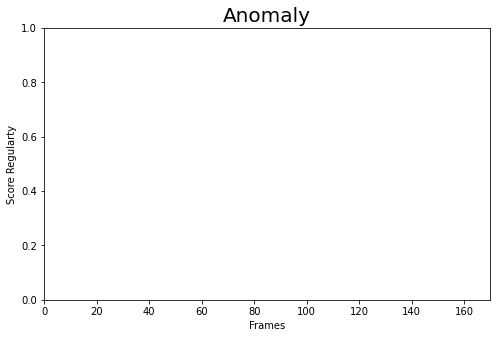

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
title = 'Score Regularty'

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1600)

fig = plt.figure(figsize=(8,5))
plt.xlim(0, 170)
plt.ylim(np.min(sr), np.max(sr))
plt.xlabel('Frames',fontsize=10)
plt.ylabel('Score Regularty',fontsize=10)
plt.title('Anomaly',fontsize=20)

data=sr.reshape(170,1)
def animate(i):
   #x=np.linspace(0,len(sr))
   #y=data[i]
   data = data[i] #select data range
   p = sns.lineplot(x=data.index, y=data[title], color="r")
   p.tick_params(labelsize=17)
   plt.setp(p.lines,linewidth=7) 

#anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
#anim = FuncAnimation(fig, animate, frames=np.arange(0, len(sr), 10), interval=1, repeat=False)
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=15, repeat=True)
plt.show()
#ani = animation.FuncAnimation(fig, animate, interval=10) 
#ani.save('HeroinOverdosesJumpy.mp4', writer=writer)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()


ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially  
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
  

anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=100, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim
  

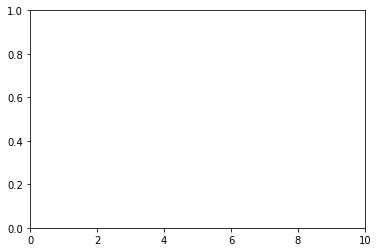

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='r')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 10, 0, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=True)
#ani.save('test.gif')
plt.show()

plot test2 001 with epoch=50


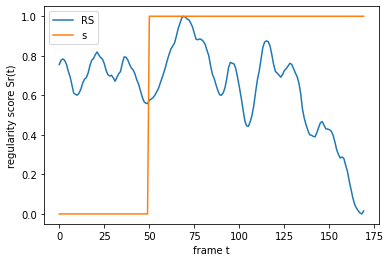

0.0
1.0


In [ ]:
print('plot test2 001 with epoch=50')
import matplotlib.pyplot as plt
plt.plot(sr, label='RS')
plt.plot(s, label='s')
#plt.fill_between(sr, np.min(s), np.max(s), where=s<sr, color='r', alpha=.4, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()
print(np.min(sr))
print(np.max(sr))

plot test2 001 with epoch=30


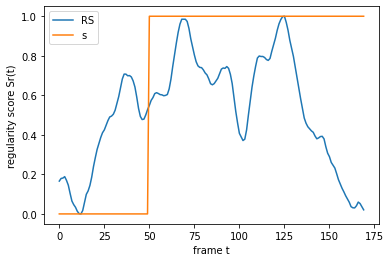

0.0
1.0


In [ ]:
print('plot test2 001 with epoch=30')
import matplotlib.pyplot as plt
plt.plot(sr, label='RS')
plt.plot(s, label='s')
#plt.fill_between(sr, np.min(s), np.max(s), where=s<sr, color='r', alpha=.4, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()
print(np.min(sr))
print(np.max(sr))

plot test2 002 with epoch=


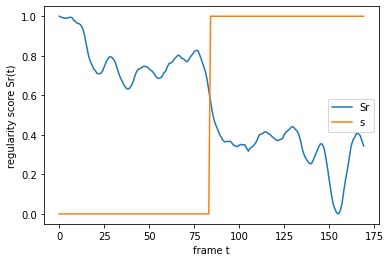

0.0
1.0


In [ ]:
print('plot test2 002 with epoch=')
import matplotlib.pyplot as plt
plt.plot(sr, label='Sr')
#plt.fill_between(sr, np.min(s), np.max(s), where=s<=sr, color='r', alpha=.4, label='s')
plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()
print(np.min(sr))
print(np.max(sr))

plot test2 001 with epoch=


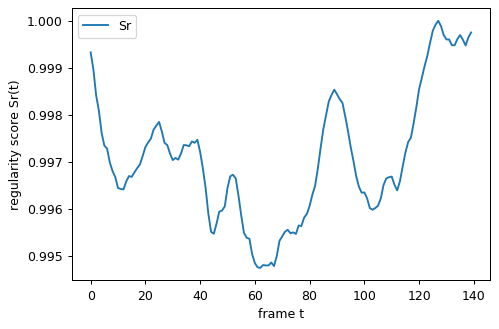

0.9947449051183036
1.0


In [ ]:
print('plot test2 001 with epoch=')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')
#plt.fill_between(sr, np.min(s), np.max(s), where=s<=sr, color='r', alpha=.4, label='s')
#plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()
print(np.min(sr))
print(np.max(sr))

plot test2 002 with epoch=30


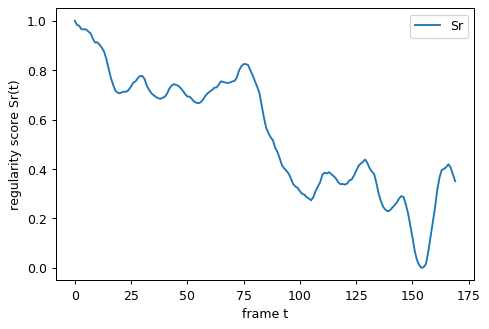

In [ ]:
print('plot test2 002 with epoch=30')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')
#plt.fill_between(sr, np.min(s), np.max(s),where=s<=0, color='r',alpha=.5, label='s')
#plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()


plot test2 003 with epoch=50


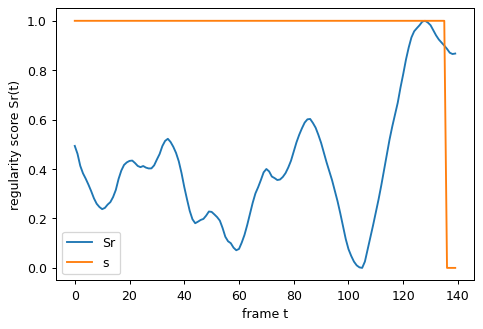

In [ ]:
print('plot test2 003 with epoch=50')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')
plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()

plot test2 003 with epoch=30


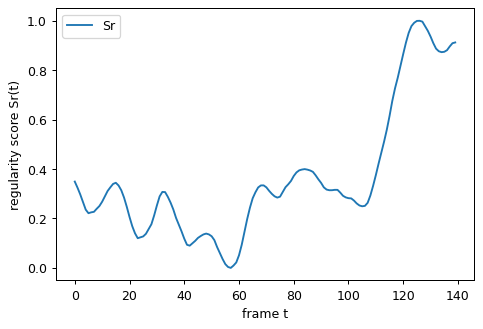

In [ ]:
print('plot test2 003 with epoch=30')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')
#plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()


plot test2 004 with epoch=30


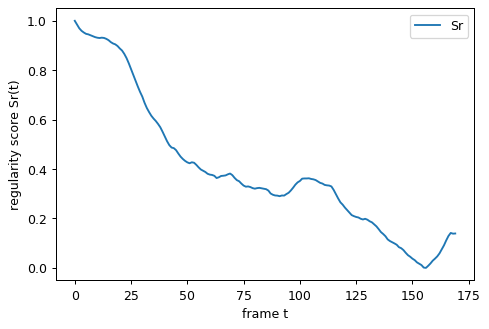

In [ ]:
print('plot test2 004 with epoch=30')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')

#plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()


plot test2 005 with epoch=30


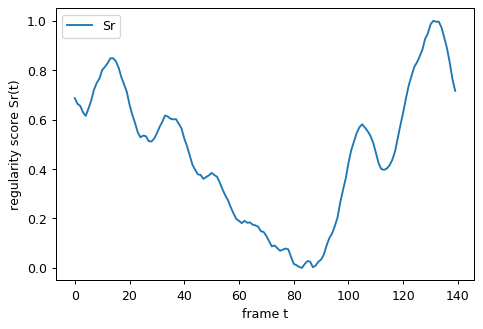

In [ ]:
print('plot test2 005 with epoch=30')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')
#plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()

plot test2 006 with epoch=30


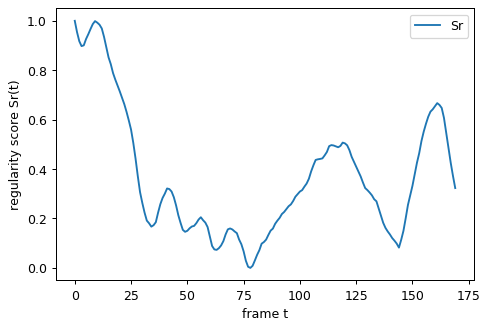

In [ ]:
print('plot test2 006 with epoch=30')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')
#plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()


plot test2 007 with epoch=30


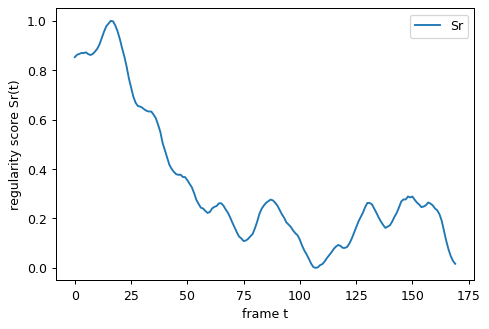

In [ ]:
print('plot test2 007 with epoch=30')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')
#plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()


plot test2 008 with epoch=30


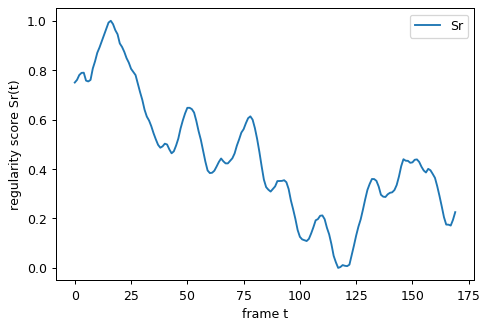

In [ ]:
print('plot test2 008 with epoch=30')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')
#plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()


plot test2 009 with epoch=30


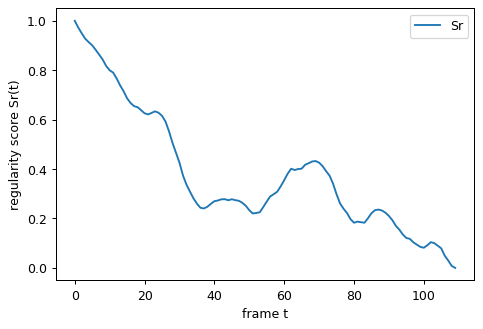

In [ ]:
print('plot test2 009 with epoch=30')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')
#plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()


plot test2 010 with epoch=30


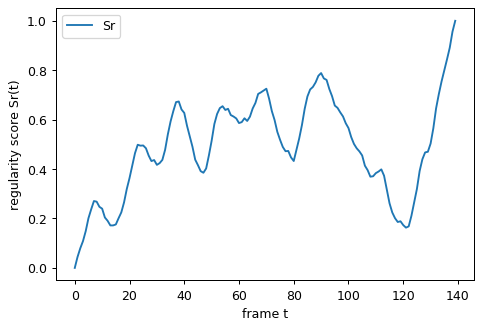

In [ ]:
print('plot test2 010 with epoch=30')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')
#plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()


plot test2 011 with epoch=30


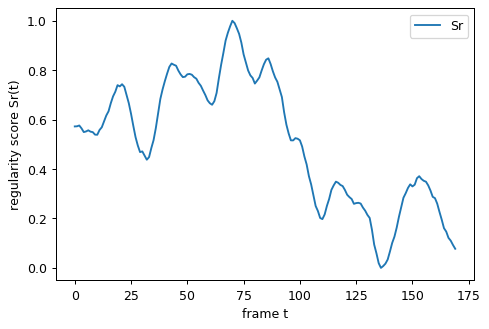

In [ ]:
print('plot test2 011 with epoch=30')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')
#plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()

plot test2 012 with epoch=30


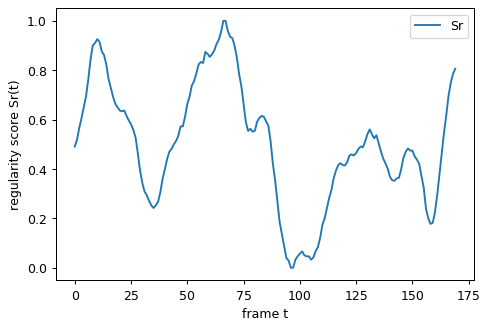

In [ ]:
print('plot test2 012 with epoch=30')
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=90)
plt.plot(sr, label='Sr')
#plt.plot(s, label='s')
plt.ylabel('regularity score Sr(t)')
plt.xlabel('frame t')
plt.legend()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min p_gt= 0.0
max p gt 0.99609375
mean p_gt= 0.0097643295


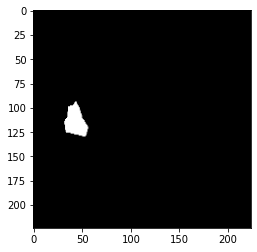

In [ ]:
p = load_img("/content/Mydrive/My Drive/UCSD/UCSDped2/GT_ped2/Test001_gt/090.bmp")
p = img_to_array(p)
p = resize(p,(224,224))
plt.imshow(p)
p = np.array(p, dtype=np.float32) / 256.0
print('min p_gt=',np.min(p))
print('max p gt',np.max(p))
print('mean p_gt=',np.mean(p))

In [ ]:
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
from keras.preprocessing.image import img_to_array, load_img
import os
import pandas as pd

path_gt= "/content/Mydrive/My Drive/UCSD/UCSDped2/GT_ped2"
gt = np.zeros(2010,)
img_gt=np.zeros(shape=(2010, 224, 224,1))
r = 0
tem=np.zeros(shape=(2010, 224, 224,1))
for f in sorted(listdir(path_gt)):
        if isdir(join(path_gt, f)):
            for c in sorted(listdir(join(path_gt, f))):
                if str(join(join(path_gt, f), c))[-3:] == "bmp":
                    img = Image.open(join(join(path_gt, f), c)).resize((224, 224))
                    img = np.array(img, dtype=np.float32) / 256.0
                    img_gt[r,:,:,0]=img 
                    r+=1  
                    
for i in range (0,2010):
      tem[i]=img_gt[i,:,:,:]
      if (np.mean(tem[i])>0.0):
            gt[i]=1.0
      else:
         gt[i]=0.0
      gt=np.array(gt)

en=len(gt)
s=gt[10:en] 
print('s=',s.shape)
#==================================
print(s.shape)
sr = sr.reshape(len(sr),1)

print('sr=',sr.shape)
#m_c = np.ones((len(sr), 4))
#m_c=temp
m_c = np.zeros((len(sr), 4))
for i in range(0,len(sr)):
     m_c[i,0]=i+11
     m_c[i,1]=sr[i]
     if (sr[i]<=0.8730555260699626):
            m_c[i,2]=1
     if (sr[i]>0.8730555260699626):
            m_c[i,2]=0
     m_c[i,3]=s[i]
df = pd.DataFrame({'rows':m_c[:,0],
                   'SR':m_c[:,1],
                   'gt':m_c[:,2],
                   'GT':m_c[:,3]})
df.to_csv('/content/Mydrive/My Drive/test folder/t30.csv') 

np.set_printoptions(formatter={'float':"{:6.5g}".format})
print(m_c)

s= (2000,)
(2000,)
sr= (2000, 1)
[[    11 0.62862      1      0]
 [    12 0.63075      1      0]
 [    13 0.63136      1      0]
 ...
 [  2008 0.6782      1      1]
 [  2009 0.68139      1      1]
 [  2010 0.68414      1      1]]


result

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


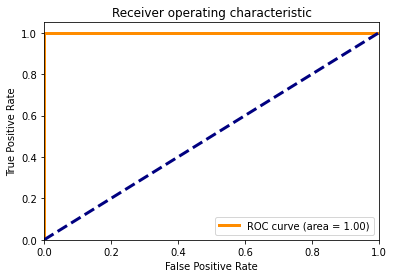

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
X=m_c[:,:-1]
y=m_c[:,-1]
y=y.reshape(-1,1)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 ))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 3
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(np.mean(m_c[:,1]))

0.9688665915100705


In [ ]:
print(m_c.shape)

(1890, 4)


In [ ]:
print('for one clip')
TP=0
FN=0
FP=0
TN=0
for i in range (0,len(sr)):
    if (m_c[i,2]==1)& (m_c[i,-1]==1):
            TP+=1
    if (m_c[i,2]==1)& (m_c[i,-1]==0):
            FP+=1
    if (m_c[i,2]==0)& (m_c[i,-1]==1):
            FN+=1  
    if (m_c[i,2]==0)& (m_c[i,-1]==0):
            TN+=1                      
print('TP',TP) 
print('FP',FP)
print('FN',FN) 
print('TN',TN) 


for one clip
TP 119
FP 50
FN 1
TN 0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
X=m_c[:,2]
y=m_c[:,3]
print(confusion_matrix(y, X,[1,0]))
print(classification_report(y,X))

[[1564   14]
 [ 111  201]]
              precision    recall  f1-score   support

         0.0       0.93      0.64      0.76       312
         1.0       0.93      0.99      0.96      1578

    accuracy                           0.93      1890
   macro avg       0.93      0.82      0.86      1890
weighted avg       0.93      0.93      0.93      1890



In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

fpr,tpr,thresholds= roc_curve(y,X)
plt.figure()
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc_score(y,X))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('AUC=',roc_auc_score(y,X))

NameError: ignored

In [ ]:
TPR=TP/(TP+FN)
print('TPR=',TPR)
FPR=FP/(FP+TN)
print('FPR=',FPR)
acc=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy=',acc)

TPR= 0.9916666666666667
FPR= 1.0
Accuracy= 0.7


In [ ]:
precision=TP/(TP+FP)
print('precision=',precision)
Recall=TP/(TP+FN)
print('Recall=',Recall)
F1=2*((precision*Recall)/(precision+Recall))
print('F1=',F1)

precision= 0.7041420118343196
Recall= 0.9916666666666667
F1= 0.8235294117647058


In [ ]:
EER=(FN+FP)/(TP+TN+FP+FN)
#EER=1-TPR
print('EER=',EER)
EER2=1-TPR
EER2

EER= 0.3


0.008333333333333304

In [ ]:
X=m_c[:,1]
y=m_c[:,-1]

In [ ]:
def selectThreshHold(y, X):
    
    F1 = 0
    bestF1 = 0
    bestEpsilon = 0
    
    stepsize = (np.max(X) - np.min(X))/1000
        
    epsVec = np.arange(np.min(X), np.max(X), stepsize)
    noe = len(epsVec)
    
    for eps in range(noe):
        epsilon = epsVec[eps]
        pred = (X < epsilon)
        prec, rec = 0,0
        tp,fp,fn = 0,0,0
        
        try:
            for i in range(np.size(X,0)):
                if ((pred[i] == 1)&(y[i] == 1)):
                    tp+=1
                elif ((pred[i] == 1)&(y[i] == 0)):
                    fp+=1
                elif ((pred[i] == 0)&(y[i] == 1)):
                    fn+=1
            prec = tp/(tp + fp)
            rec = tp/(tp + fn)
            F1 = 2*prec*rec/(prec + rec)
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon = epsilon
        except ZeroDivisionError:
            print('Warning dividing by zero!!')          
       
    return bestF1, bestEpsilon

In [ ]:
F1, epsilon = selectThreshHold(y, X)
print('Epsilon and F1 are:',epsilon, F1)

Warning dividing by zero!!
Epsilon and F1 are: 0.998 0.9091435185185185


In [ ]:
len(m_c)

1890

In [ ]:
for i in range(len(m_c)):
      if (m_c[i,1]<0.88):
          m_c[:,2]=1

In [ ]:
m_c.shape

(1890, 4)

In [ ]:
print('for all clip for diff threshold')
TP=0
FN=0
FP=0
TN=0
for i in range (0,len(m_c)):
    if (m_c[i,2]==1)& (m_c[i,-1]==1):
            TP+=1
    if (m_c[i,2]==1)& (m_c[i,-1]==0):
            FP+=1
    if (m_c[i,2]==0)& (m_c[i,-1]==1):
            FN+=1  
    if (m_c[i,2]==0)& (m_c[i,-1]==0):
            TN+=1                      
print('TP',TP) 
print('FN',FN) 
print('FP',FP) 
print('TN',TN) 


for all clip for diff threshold
TP 1564
FN 14
FP 111
TN 201


In [ ]:
TPR=TP/(TP+FN)
print('TPR=',TPR)
FPR=FP/(FP+TN)
print('FPR=',FPR)
acc=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy=',acc)

TPR= 0.991128010139417
FPR= 0.3557692307692308
Accuracy= 0.9338624338624338


In [ ]:
precision=TP/(TP+FP)
print('precision=',precision)
Recall=TP/(TP+FN)
print('Recall=',Recall)
F1=2*((precision*Recall)/(precision+Recall))
print('F1=',F1)

precision= 0.9337313432835821
Recall= 0.991128010139417
F1= 0.9615739317553028


In [ ]:
EER=(FN+FP)/(TP+TN+FP+FN)
#EER=1-TPR
print('EER=',EER)
EER2=1-TPR
EER2

EER= 0.06613756613756613


0.008871989860583018

ROC with Diff threshold

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


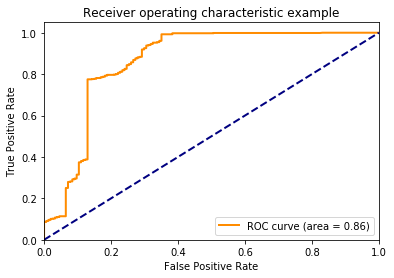

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
X=m_c[:,:-1]
y=m_c[:,-1]
y=y.reshape(-1,1)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 ))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
EER=(FN+FP)/(TP+TN+FP+FN)
#EER=1-TPR
print('EER=',EER)
EER2=1-TPR
EER2

EER= 0.07037037037037037


0.06762417713943747

ROC with unic threshold

In [ ]:
print('for all clip for diff threshold')
TP=0
FN=0
FP=0
TN=0
for i in range (0,len(m_c)):
    if (m_c[i,2]==1)& (m_c[i,-1]==1):
            TP+=1
    if (m_c[i,2]==1)& (m_c[i,-1]==0):
            FP+=1
    if (m_c[i,2]==0)& (m_c[i,-1]==1):
            FN+=1  
    if (m_c[i,2]==0)& (m_c[i,-1]==0):
            TN+=1                      
print('TP',TP) 
print('FN',FN) 
print('FP',FP) 
print('TN',TN) 

for all clip for diff threshold
TP 1639
FN 305
FP 9
TN 47


In [ ]:
TPR=TP/(TP+FN)
print('TPR=',TPR)
FPR=FP/(FP+TN)
print('FPR=',FPR)
acc=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy=',acc)

TPR= 0.8431069958847737
FPR= 0.16071428571428573
Accuracy= 0.843


In [ ]:
precision=TP/(TP+FP)
print('precision=',precision)
Recall=TP/(TP+FN)
print('Recall=',Recall)
F1=2*((precision*Recall)/(precision+Recall))
print('F1=',F1)

precision= 0.9945388349514563
Recall= 0.8431069958847737
F1= 0.9125835189309577


/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


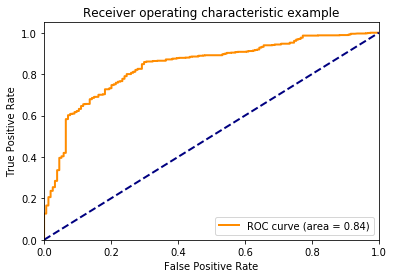

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
X=m_c[:,:-1]
y=m_c[:,-1]
y=y.reshape(-1,1)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 ))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
EER=(FN+FP)/(TP+TN+FP+FN)
#EER=1-TPR
print('EER=',EER)
EER2=1-TPR
EER2

EER= 0.16507936507936508


0.16507936507936505

In [ ]:
def findIndices(binVec):
    l = []
    for i in range(len(binVec)):
        if binVec[i] == 1:
            l.append(i)
    return l

In [ ]:
outliersTest = m_c[:,1] < epsilon
listOfOl = findIndices(outliersTest)

print('\n\n Outliers are:\n',listOfOl)
print('\n\nNumber of outliers are: ',len(listOfOl))

In [ ]:
l = []
for j in range(len(m_c)):
      if (m_c[j,1] < epsilon):
         l.append(j)
print(l)        

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


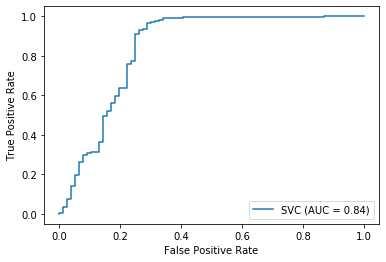

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
#from sklearn.datasets import load_wine
X=m_c[:,:-1]
y=m_c[:,-1]
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = plot_roc_curve(svc, X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
np.argmax(y, axis=1)
confusion_matrix(y, X)




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 10, 56, 56, 128)   15616     
_________________________________________________________________
layer_normalization_1 (Layer (None, 10, 56, 56, 128)   256       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 10, 28, 28, 64)    204864    
_________________________________________________________________
layer_normalization_2 (Layer (None, 10, 28, 28, 64)    128       
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 10, 28, 28, 64)    295168    
_________________________________________________________________
layer_normalization_3 (Layer (None, 10, 28, 28, 64)    128       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 10, 28, 28, 32)

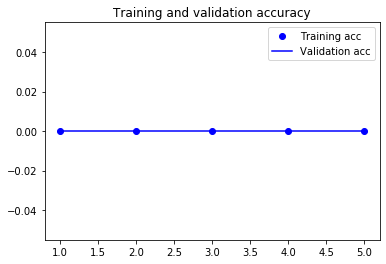

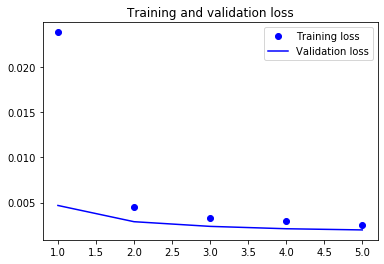

got model_ped2
(120, 224, 224, 1)
got data_ped2


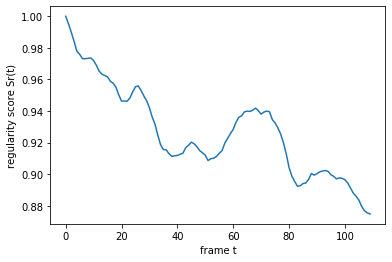

In [ ]:
#epoch=5
evaluate()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


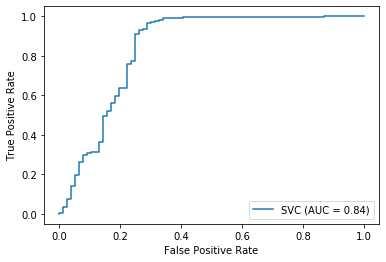

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
#from sklearn.datasets import load_wine
X=m_c[:,:-1]
y=m_c[:,-1]
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = plot_roc_curve(svc, X_test, y_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X=m_c[:,:-1]
y=m_c[:,-1]
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

supportVectorClassifier = SVC(kernel = 'linear', probability = True)
supportVectorClassifier.fit(X_train, y_train)
y_pred = supportVectorClassifier.predict(X_test)

print("Support Vector Machine score: {0:.2f}%".format(supportVectorClassifier.score(X_test, y_test)*100))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine score: 81.13%


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  0, 107],
       [  0, 460]])

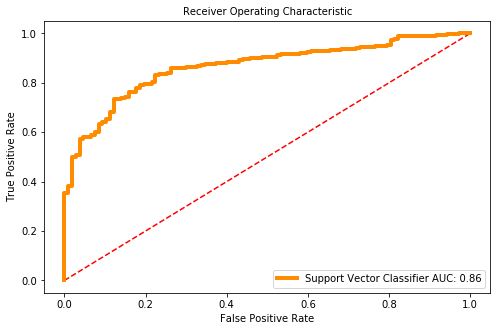

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (8, 5))
plt.plot([0,1], [0,1], 'r--')

probs = supportVectorClassifier.predict_proba(X_test)
# Reading probability of second class
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'darkorange', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 10)
plt.title('Receiver Operating Characteristic', fontsize = 10)
plt.legend(loc = 'lower right', fontsize = 10)

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (8, 5))
plt.plot([0,1], [0,1], 'r--')

probs = supportVectorClassifier.predict_proba(X_test)
# Reading probability of second class
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'darkorange', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 10)
plt.title('Receiver Operating Characteristic', fontsize = 10)
plt.legend(loc = 'lower right', fontsize = 10)

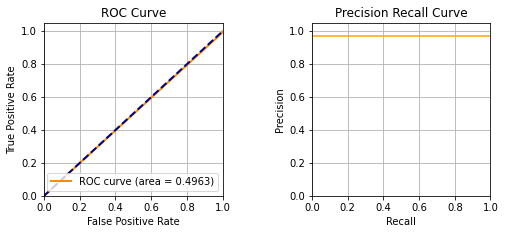

In [ ]:
# Get ROC curve FPR and TPR from true labels vs score values
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import norm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
X=m_c[:,2]
X=X.reshape(-1,1)

y=m_c[:,-1]
y=y.reshape(-1,1)

fpr, tpr, _ = roc_curve(y, X)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(y, X)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


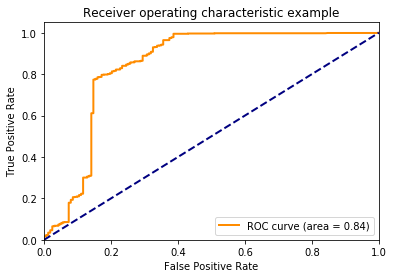

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
X=m_c[:,:-1]
y=m_c[:,-1]
y=y.reshape(-1,1)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 ))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, X, pos_label=1)

eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, thresholds)(eer)

0.9941860465116279


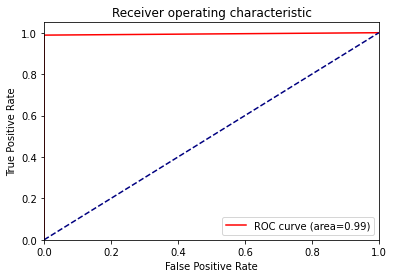

In [ ]:
#======================================
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
X=m_c[:,2]
#X=X.reshape(-1,1)
y=m_c[:,3]
y=y.reshape(-1,1)
fpr,tpr,threshold=metrics.roc_curve(y,X,pos_label=1)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure()
plt.plot(fpr,tpr, color='r',label='ROC curve (area=%0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


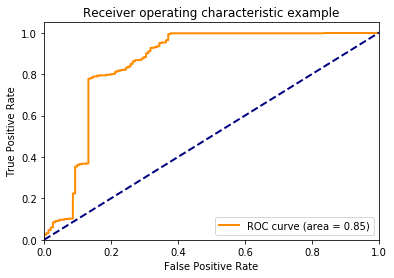

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
X=m_c[:,:-1]
y=m_c[:,-1]
y=y.reshape(-1,1)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 ))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve
X=m_c[:,2]
y=m_c[:,-1]
fpr, tpr, thresholds = roc_curve(y, X, pos_label=1)
compute_eer(fpr,tpr,thresholds)
#eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
#thresh = interp1d(fpr, thresholds)(eer)

(0.5, 2.0)

In [ ]:
def compute_eer(fpr,tpr,thresholds):
    """ Returns equal error rate (EER) and the corresponding threshold. """
    fnr = 1-tpr
    abs_diffs = np.abs(fpr - fnr)
    min_index = np.argmin(abs_diffs)
    eer = np.mean((fpr[min_index], fnr[min_index]))
    return eer, thresholds[min_index]

In [ ]:
from sklearn import metrics
fpr, tpr, threshold = roc_curve(y, X, pos_label=1)
EER = threshold(np.argmin(abs(tpr-fpr)))
print(EER)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


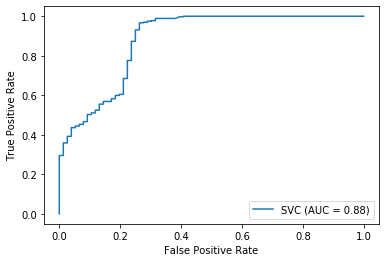

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
#from sklearn.datasets import load_wine

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = plot_roc_curve(svc, X_test, y_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X=m_c[:,:-1]
y=m_c[:,-1]
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

supportVectorClassifier = SVC(kernel = 'linear', probability = True)
supportVectorClassifier.fit(X_train, y_train)
y_pred = supportVectorClassifier.predict(X_test)

print("Support Vector Machine score: {0:.2f}%".format(supportVectorClassifier.score(X_test, y_test)*100))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine score: 83.67%


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 28,  94],
       [  4, 474]])

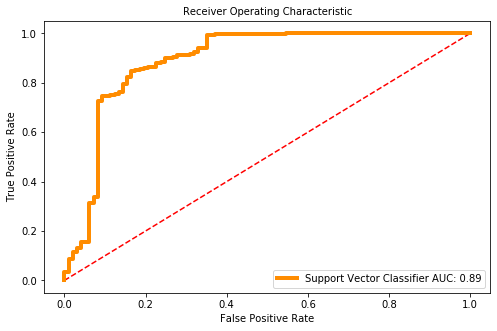

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (8, 5))
plt.plot([0,1], [0,1], 'r--')

probs = supportVectorClassifier.predict_proba(X_test)
# Reading probability of second class
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'darkorange', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 10)
plt.ylabel('True Positive Rate', fontsize = 10)
plt.title('Receiver Operating Characteristic', fontsize = 10)
plt.legend(loc = 'lower right', fontsize = 10)


In [ ]:
tpr
eer=1-tpr
eer.mean()


0.3223955470038483

In [ ]:
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, m_c[:,2], pos_label=1)

eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, thresholds)(eer)

In [ ]:
len(m_c)

1750

In [ ]:
m_c.shape
TP=0
FN=0
FP=0
TN=0
for i in range (0,len(m_c)):
    if (m_c[i,2]==1)& (m_c[i,-1]==1):
            TP+=1
    if (m_c[i,2]==1)& (m_c[i,-1]==0):
            FN+=1
    if (m_c[i,2]==0)& (m_c[i,-1]==1):
            FP+=1  
    if (m_c[i,2]==0)& (m_c[i,-1]==0):
            TN+=1                      
print('TP',TP) 
print('FN',FN) 
print('FP',FP) 
print('TN',TN) 

TP 1423
FN 109
FP 19
TN 199


In [ ]:
TPR=TP/(TP+FN)
print('TPR=',TPR)
FPR=FP/(FP+TN)
print('FPR=',FPR)
acc=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy=',acc)

TPR= 0.9288511749347258
FPR= 0.0871559633027523
Accuracy= 0.9268571428571428


In [ ]:
precision=TP/(TP+FP)
print('precision=',precision)
Recall=TP/(TP+FN)
print('Recall=',Recall)
F1=2*((precision*Recall)/(precision+Recall))
print('F1=',F1)

precision= 0.9868238557558946
Recall= 0.9288511749347258
F1= 0.956960322797579


In [ ]:
EER=(FN+FP)/(TP+TN+FP+FN)
#EER=1-TPR
print('EER=',EER)
EER2=1-TPR
EER2

EER= 0.07314285714285715


0.0711488250652742

In [ ]:
X=m_c[:,1]
y=m_c[:,-1]

In [ ]:
def selectThreshHold(y, X):
    
    F1 = 0
    bestF1 = 0
    bestEpsilon = 0
    
    stepsize = (np.max(X) - np.min(X))/1000
        
    epsVec = np.arange(np.min(X), np.max(X), stepsize)
    noe = len(epsVec)
    
    for eps in range(noe):
        epsilon = epsVec[eps]
        pred = (X < epsilon)
        prec, rec = 0,0
        tp,fp,fn = 0,0,0
        
        try:
            for i in range(np.size(X,0)):
                if ((pred[i] == 1)&(y[i] == 1)):
                    tp+=1
                elif ((pred[i] == 1)&(y[i] == 0)):
                    fp+=1
                elif ((pred[i] == 0)&(y[i] == 1)):
                    fn+=1
            prec = tp/(tp + fp)
            rec = tp/(tp + fn)
            F1 = 2*prec*rec/(prec + rec)
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon = epsilon
        except ZeroDivisionError:
            print('Warning dividing by zero!!')          
       
    return bestF1, bestEpsilon

In [ ]:
F1, epsilon = selectThreshHold(v2, v1)
print('Epsilon and F1 are:',epsilon, F1)

Warning dividing by zero!!
Epsilon and F1 are: 0.998 0.9028607356177303


In [ ]:
for i in range (len(m_c)):
    if (m_c[i,1]< 0.5):
        m_c[i,2]=1


In [ ]:
m_c.shape
TP=0
FN=0
FP=0
TN=0
for i in range (0,len(m_c)):
    if (m_c[i,2]==1)& (m_c[i,-1]==1):
            TP+=1
    if (m_c[i,2]==1)& (m_c[i,-1]==0):
            FN+=1
    if (m_c[i,2]==0)& (m_c[i,-1]==1):
            FP+=1  
    if (m_c[i,2]==0)& (m_c[i,-1]==0):
            TN+=1                      
print('TP',TP) 
print('FN',FN) 
print('FP',FP) 
print('TN',TN) 

TP 1436
FN 303
FP 6
TN 5


In [ ]:
TPR=TP/(TP+FN)
print('TPR=',TPR)
FPR=FP/(FP+TN)
print('FPR=',FPR)
acc=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy=',acc)

TPR= 0.8257619321449109
FPR= 0.5454545454545454
Accuracy= 0.8234285714285714


In [ ]:
precision=TP/(TP+FP)
print('precision=',precision)
Recall=TP/(TP+FN)
print('Recall=',Recall)
F1=2*((precision*Recall)/(precision+Recall))
print('F1=',F1)

precision= 0.9958391123439667
Recall= 0.8257619321449109
F1= 0.9028607356177303


In [ ]:
EER=(FN+FP)/(TP+TN+FP+FN)
#EER=1-TPR
print('EER=',EER)
EER2=1-TPR
EER2

EER= 0.17657142857142857


0.1742380678550891

nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:88: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


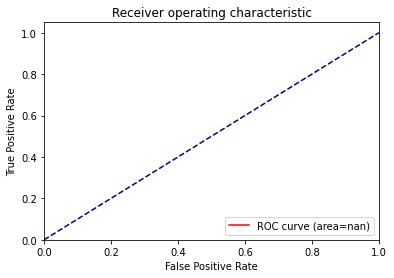

In [ ]:
from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

X=m_c[:,2]
#X=X.reshape(-1,1)
y=m_c[:,3]
y=y.reshape(-1,1)
fpr,tpr,threshold = metrics.roc_curve(y,X,pos_label=1)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure()
plt.plot(fpr,tpr, color='r',label='ROC curve (area=%0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
TP=0
FN=0
FP=0
TN=0
for i in range (0,len(m_c)):
    if (m_c[i,2]==1)& (m_c[i,-1]==1):
            TP+=1
    if (m_c[i,2]==1)& (m_c[i,-1]==0):
            FN+=1
    if (m_c[i,2]==0)& (m_c[i,-1]==1):
            FP+=1  
    if (m_c[i,2]==0)& (m_c[i,-1]==0):
            TN+=1                      
print('TP',TP) 
print('FN',FN) 
print('FP',FP) 
print('TN',TN)

TP 1578
FN 312
FP 0
TN 0


In [ ]:
for i in range(len(m_c)):
      if (m_c[i,1]<0.998):
          m_c[:,2]=1

In [ ]:
TP=0
FN=0
FP=0
TN=0
for i in range (0,len(m_c)):
    if (m_c[i,2]==1)& (m_c[i,-1]==1):
            TP+=1
    if (m_c[i,2]==1)& (m_c[i,-1]==0):
            FN+=1
    if (m_c[i,2]==0)& (m_c[i,-1]==1):
            FP+=1  
    if (m_c[i,2]==0)& (m_c[i,-1]==0):
            TN+=1                      
print('TP',TP) 
print('FN',FN) 
print('FP',FP) 
print('TN',TN)

TP 1578
FN 312
FP 0
TN 0


nan


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:88: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


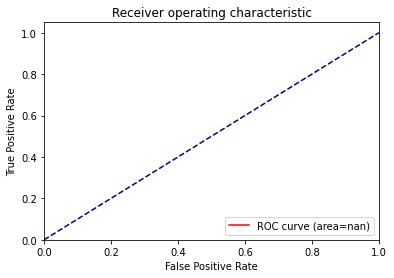

In [ ]:
v1=[.1,.2,.3,.4,.6,.7,.9,.5,.3,8]
v2=[0,0,1,1,1,1,0,1,1,1]
fpr,tpr,threshold=metrics.roc_curve(m_c[:,3], m_c[:,2], pos_label=1)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure()
plt.plot(fpr,tpr, color='r',label='ROC curve (area=%0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
F1, epsilon = selectThreshHold(v2, v1)
print('Epsilon and F1 are:',epsilon, F1)